# Searching the most-efficient source of food


## Greenhouse gas emission

In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [442]:
# constants

DATA_PATH = './data/'
DATA_PATH_RAW = DATA_PATH + 'current_FAO/raw_files/'

Let us first have a look at the total emission by agriculture. For this we use the 'Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm)' dataset. MetaData can be found here: http://www.fao.org/faostat/en/#data/GT/metadata

In [443]:
emission_total_path = DATA_PATH_RAW+'Emissions_Agriculture_Agriculture_total_E_All_Data_(Norm).csv'
emissions_total = pd.read_csv(emission_total_path, encoding='latin-1', engine='python')

In [444]:
print(emissions_total.shape)
emissions_total

(326182, 11)


,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,5058,Enteric Fermentation,7231,Emissions (CO2eq),1961,1961,Gigagrams,5054.3459,A
1,2,Afghanistan,5058,Enteric Fermentation,7231,Emissions (CO2eq),1962,1962,Gigagrams,5151.5228,A
2,2,Afghanistan,5058,Enteric Fermentation,7231,Emissions (CO2eq),1963,1963,Gigagrams,5372.3989,A
3,2,Afghanistan,5058,Enteric Fermentation,7231,Emissions (CO2eq),1964,1964,Gigagrams,5440.3650,A
4,2,Afghanistan,5058,Enteric Fermentation,7231,Emissions (CO2eq),1965,1965,Gigagrams,5577.5580,A
...,...,...,...,...,...,...,...,...,...,...,...
326177,5873,OECD,1709,Agricultural Soils,7243,Emissions (CO2eq) from N2O,2012,2012,Gigagrams,507201.5669,A
326178,5873,OECD,1709,Agricultural Soils,7243,Emissions (CO2eq) from N2O,2013,2013,Gigagrams,515750.7919,A
326179,5873,OECD,1709,Agricultural Soils,7243,Emissions (CO2eq) from N2O,2014,2014,Gigagrams,526015.4357,A
326180,5873,OECD,1709,Agricultural Soils,7243,Emissions (CO2eq) from N2O,2030,2030,Gigagrams,525722.7988,A


In [445]:
# check for NaN values
emissions_total.columns[emissions_total.isna().any()]

Index([], dtype='object')

In [446]:
# What kind of emissions are there?
print("We have the following kind of emissions:",emissions_total['Element'].unique())
#print(emissions_total['Element Code'].unique())

# Units are all in Gigagrams
# print(emissions_total['Unit'].unique())

#emissions_total['Country'].unique()

We have the following kind of emissions: ['Emissions (CO2eq)' 'Emissions (CO2eq) from CH4'
 'Emissions (CO2eq) from N2O']


CO2eq means 'Carbon dioxide equivalent'
https://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Carbon_dioxide_equivalent

Amount of greenhouse gas (N20 + CH4) emitted per product? 

In [447]:
element_code = {'CO2eq': 7231, 'N2O': 7243, 'CH4': 7244}
columns = ['Item', 'Value']

In [448]:
emissions_world = emissions_total[(emissions_total['Country'] == 'World')]

In [449]:
%%capture

emissions_world_C02eq = emissions_world[emissions_world['Element Code'] == element_code['CO2eq']]
emissions_world_C02eq = emissions_world_C02eq[columns].groupby(['Item']).sum().reset_index().set_index('Item')

emissions_world_N2O = emissions_world[emissions_world['Element Code'] == element_code['N2O']]
emissions_world_N2O = emissions_world_N2O[columns].groupby(['Item']).sum().reset_index().set_index('Item')

emissions_world_CH4 = emissions_world[emissions_world['Element Code'] == element_code['CH4']]
emissions_world_CH4 = emissions_world_CH4[columns].groupby(['Item']).sum().reset_index().set_index('Item')

In [450]:
# Drop stats that are sum of the others
emissions_world_C02eq.drop(['Agricultural Soils', 'Agriculture total'], inplace=True)
emissions_world_C02eq.sort_values('Value', ascending=False, inplace=True)

emissions_world_N2O.drop(['Agricultural Soils', 'Agriculture total'], inplace=True)
emissions_world_N2O.sort_values('Value', ascending=False, inplace=True)

emissions_world_CH4.drop('Agriculture total', inplace=True)
emissions_world_CH4.sort_values('Value', ascending=False, inplace=True)

In [451]:
# Left join
emissions_plot = emissions_world_C02eq.join(emissions_world_N2O, lsuffix="CO2eq", rsuffix="N20").join(emissions_world_CH4)\
                    .rename({'Value':'ValueCH4'}, axis=1).reset_index().fillna(0)

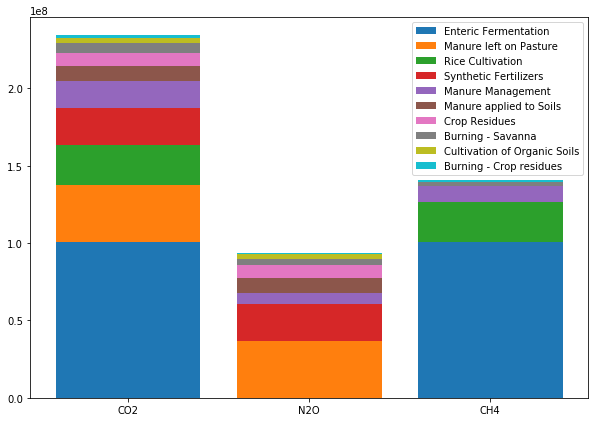

In [452]:
from matplotlib.rcsetup import cycler

fig, ax = plt.subplots(figsize=(10,7))  

items = emissions_plot['Item']
margin_bottom = np.zeros(emissions_plot.shape[1]-1)

ind = ["CO2", "N2O", "CH4"]

colors = plt.cm.tab10(np.linspace(0, 1, len(emissions_plot['Item'])))

for num, item in enumerate(items):
    values = list(emissions_plot.loc[num])[1:4]
    ax.set_prop_cycle(c)
    plt.bar(ind, values, bottom=margin_bottom, color = colors[num],label=item)
    margin_bottom += values
plt.legend()
plt.show()


It is obvious that Enteric Fermentation is (in total) the biggest emmitor of greenhouse gasses, but this is only from CH4, and it produces no N20
<font color=red>TODO: check what has the worst impact on the environment</font> 